<a href="https://colab.research.google.com/github/EhsanEs-hub/ML-practice-folder/blob/master/FooladPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np
import pandas as pd
import io
from google.colab import drive, files
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [113]:
uploaded = files.upload()

Saving Foolad.csv to Foolad.csv


In [123]:
df = pd.read_csv('Foolad.csv')
print(df.head())

      GDate  NumberTrade  VolumeTrade  ...  PriceMax  PriceFirst  PriceYesterday
0  20170430          489     10434448  ...      1380        1342            1360
1  20170501          581     12023346  ...      1378        1350            1355
2  20170502          257      3642451  ...      1363        1361            1367
3  20170503          448      8274997  ...      1380        1350            1360
4  20170506          285      3750833  ...      1375        1350            1365

[5 rows x 9 columns]


In [124]:

df.columns = ['date', 'NumberTrade', 'VolumeTrade', 'ClosePrice', 'LastPrice', 'PriceMin', 'PriceMax', 'PriceFirst', 'PriceYesterday']
df.date = pd.to_datetime(df.date,format='%Y%m%d') 
df = df.set_index(df.date)
df = df[['NumberTrade', 'VolumeTrade', 'ClosePrice', 'LastPrice', 'PriceMin', 'PriceMax', 'PriceFirst', 'PriceYesterday']]
df = df.drop_duplicates(keep=False)
df

,NumberTrade,VolumeTrade,ClosePrice,LastPrice,PriceMin,PriceMax,PriceFirst,PriceYesterday
date,,,,,,,,
2017-04-30,489,10434448,1355,1350,1333,1380,1342,1360
2017-05-01,581,12023346,1367,1360,1343,1378,1350,1355
2017-05-02,257,3642451,1360,1344,1344,1363,1361,1367
2017-05-03,448,8274997,1365,1380,1340,1380,1350,1360
2017-05-06,285,3750833,1356,1340,1336,1375,1350,1365
...,...,...,...,...,...,...,...,...
2020-06-06,16994,166412659,10066,10107,9800,10107,10000,9626
2020-06-07,17705,228499778,10562,10549,10107,10569,10569,10066
2020-06-08,55081,362079351,10589,10270,10034,11090,10034,10562


In [119]:
df.shape

(691, 8)

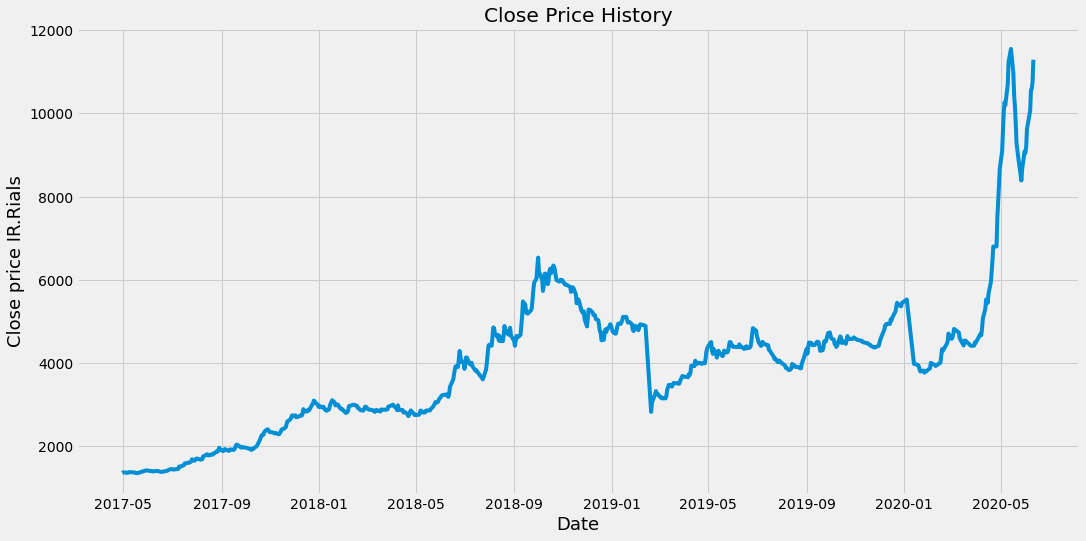

In [117]:
# Visualize close price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['ClosePrice'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price IR.Rials', fontsize=18)
plt.show()

In [134]:
# Create a new dataframe with only the 'close column
data = df.filter(['ClosePrice'])
# Convert DataFrame to np Array
dataset = data.values
# Get the number of rows to Train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len
# data
# dataset

553

In [0]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# scaled_data

In [137]:
# Creating the scaled training data set
train_data = scaled_data[0:training_data_len , :] # : means get all the columns
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
 x_train.append(train_data[i-60:i, 0])
 y_train.append(train_data[i, 0])
 if i<=61:
   print(x_train)
   print(y_train)
   print()


[array([5.88177630e-04, 1.76453289e-03, 1.07832565e-03, 1.56847368e-03,
       6.86207235e-04, 6.86207235e-04, 1.96059210e-03, 2.35271052e-03,
       2.15665131e-03, 1.66650328e-03, 1.47044407e-03, 1.17635526e-03,
       1.17635526e-03, 0.00000000e+00, 9.80296049e-05, 1.37241447e-03,
       1.66650328e-03, 2.05862170e-03, 3.13694736e-03, 4.50936183e-03,
       5.48965788e-03, 5.88177630e-03, 6.37192432e-03, 6.56798353e-03,
       4.99950985e-03, 4.99950985e-03, 3.82315459e-03, 4.50936183e-03,
       5.39162827e-03, 5.09753946e-03, 4.60739143e-03, 2.64679933e-03,
       2.74482894e-03, 5.39162827e-03, 8.62660523e-03, 9.70493089e-03,
       8.82266444e-03, 8.13645721e-03, 8.52857563e-03, 9.21478286e-03,
       9.41084207e-03, 9.90099010e-03, 1.55867072e-02, 1.51945888e-02,
       1.56847368e-02, 1.78413881e-02, 1.91157730e-02, 2.29389276e-02,
       2.48014900e-02, 2.62719341e-02, 2.74482894e-02, 3.25458288e-02,
       2.89187335e-02, 3.06832663e-02, 3.37221841e-02, 3.44083913e-02,
     

In [141]:
# Convert the x_train and y_train to np arrays
x_train , y_train = np.array(x_train) , np.array(y_train)
x_train.shape

(493, 60)

In [142]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(493, 60, 1)

In [0]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [0]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [145]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
493/493 [==============================] - 21s 43ms/step - loss: 0.0020


In [0]:
# Create the test data set
test_data = scaled_data[training_data_len-60: , :]
# Create data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

# Convert the x_test to np arrays
x_test = np.array(x_test) 

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
# plot the predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [152]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( predictions - y_test)**2)
rmse

31.801750735960145

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


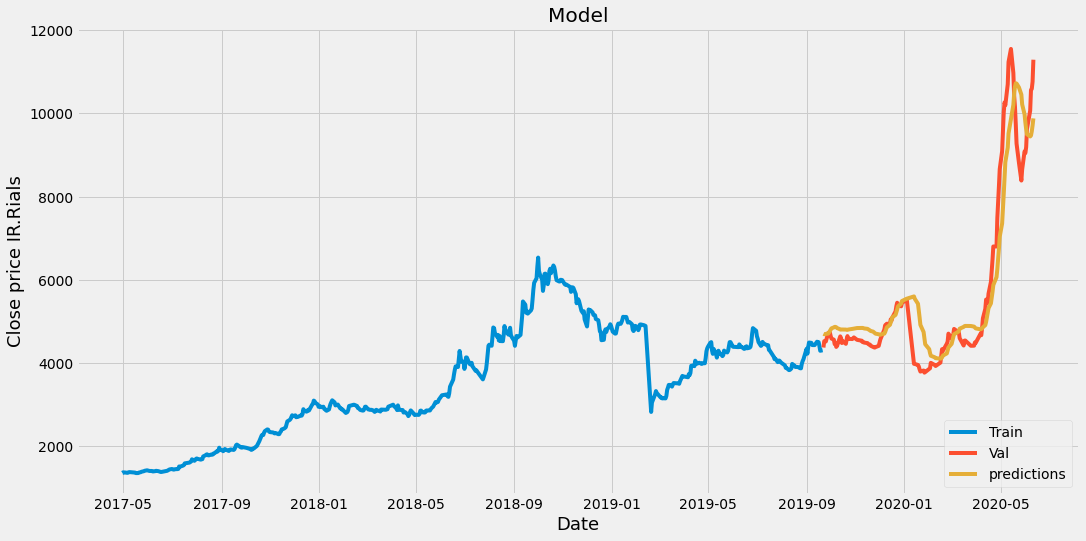

In [153]:
# plot ihe data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
# Visualize close price history
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price IR.Rials', fontsize=18)
plt.plot(train['ClosePrice'])
plt.plot(valid[['ClosePrice','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()